In [30]:
# Importamos librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
# Cargamos el dataset spotify
file_path = "SpotifyFeatures.csv"
df = pd.read_csv(file_path)


In [5]:
# Obtener un resumen de la información de la base de datos (tipos de datos, valores nulos, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
# Obtener estadísticas descriptivas de las columnas numéricas
print(df.describe())

          popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000       

In [7]:
#Tamaño del dataset
print(df.shape)
print(type(df.shape))

(232725, 18)
<class 'tuple'>


In [8]:
#Tipos de géneros
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

<Axes: xlabel='genre'>

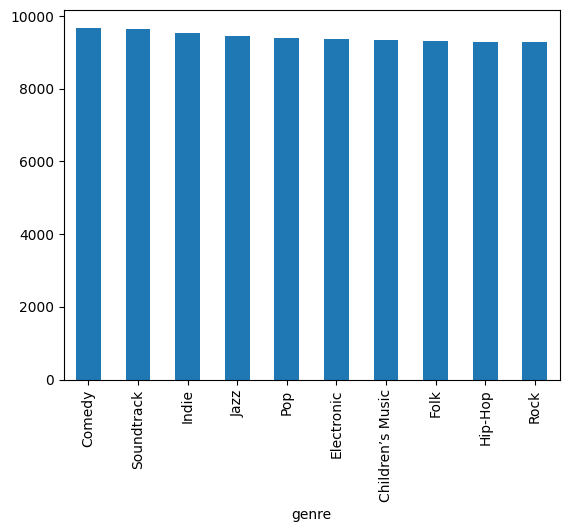

In [9]:
#Cuáles son los géneros musicales más representados en el dataset
df['genre'].value_counts().head(10).plot(kind='bar')

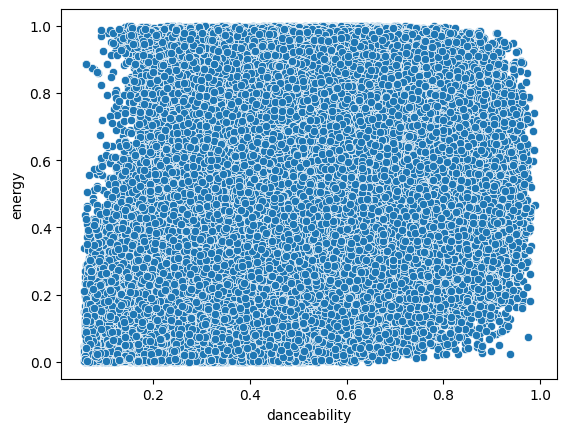

In [10]:
#Existe alguna correlación entre la "danceability(bailable)" y la "energy" de las canciones
import matplotlib.pyplot as plt

sns.scatterplot(x='danceability', y='energy', data=df)
plt.show()

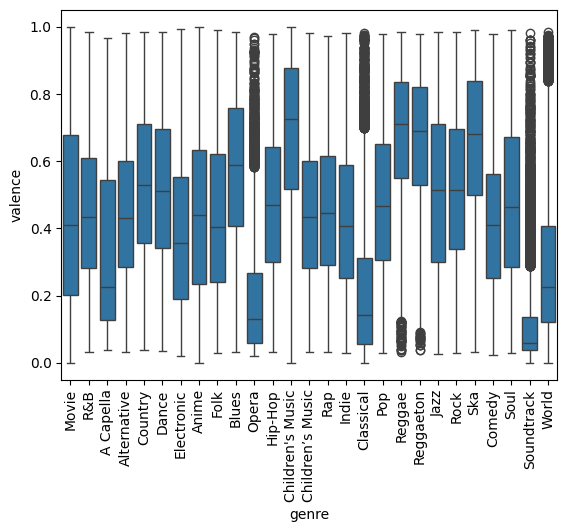

In [11]:
#Cómo varían las características como la "valence" (positividad musical) o el "tempo" entre diferentes géneros
sns.boxplot(x='genre', y='valence', data=df)
plt.xticks(rotation=90)
plt.show()

In [12]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Calcular la inercia para un rango de valores de k
# Vamos a probar k desde 1 hasta 15
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

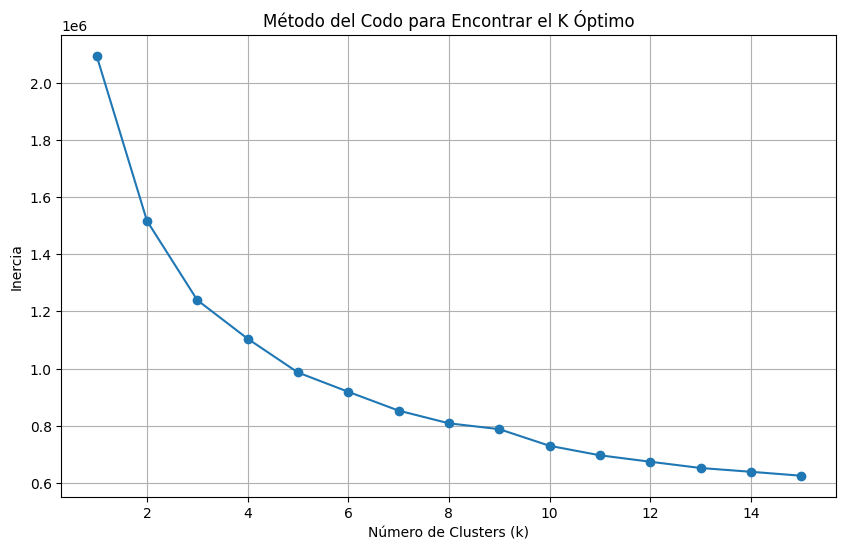

In [14]:
# 3. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Encontrar el K Óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [15]:
# Suponiendo que el método del codo nos dice que k=5 es el óptimo
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

In [16]:
# Calcular el índice de Calinski-Harabasz para un rango de valores de k
calinski_harabasz_scores = []
k_range = range(2, 16) # Requiere al menos 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    calinski_harabasz_scores.append(score)

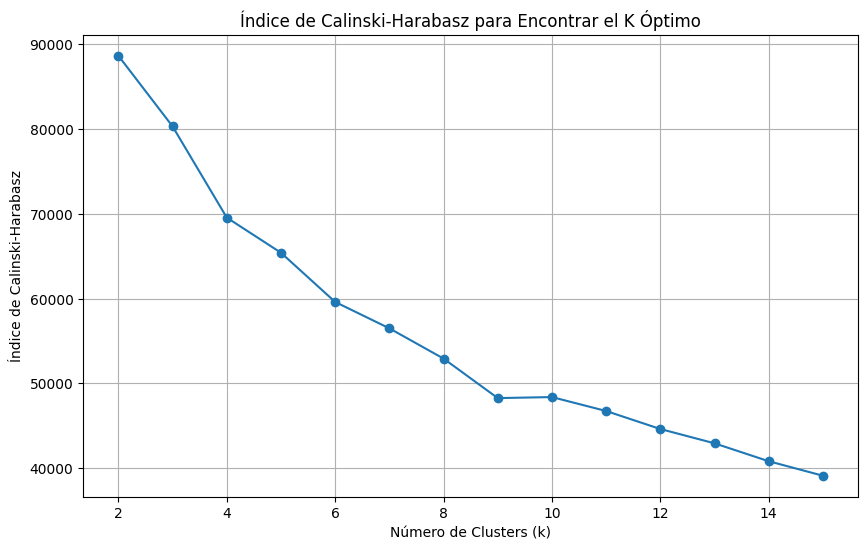

In [17]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, calinski_harabasz_scores, marker='o')
plt.title('Índice de Calinski-Harabasz para Encontrar el K Óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Calinski-Harabasz')
plt.grid(True)
plt.show()

In [18]:
# Asignar los clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_


In [54]:
# Aplicar PCA para retener el 96% de la varianza
# PCA encontrará el número de componentes principales necesario para explicar el 96% de la varianza
pca = PCA(n_components=0.96, random_state=42)
X_pca = pca.fit_transform(X_scaled)

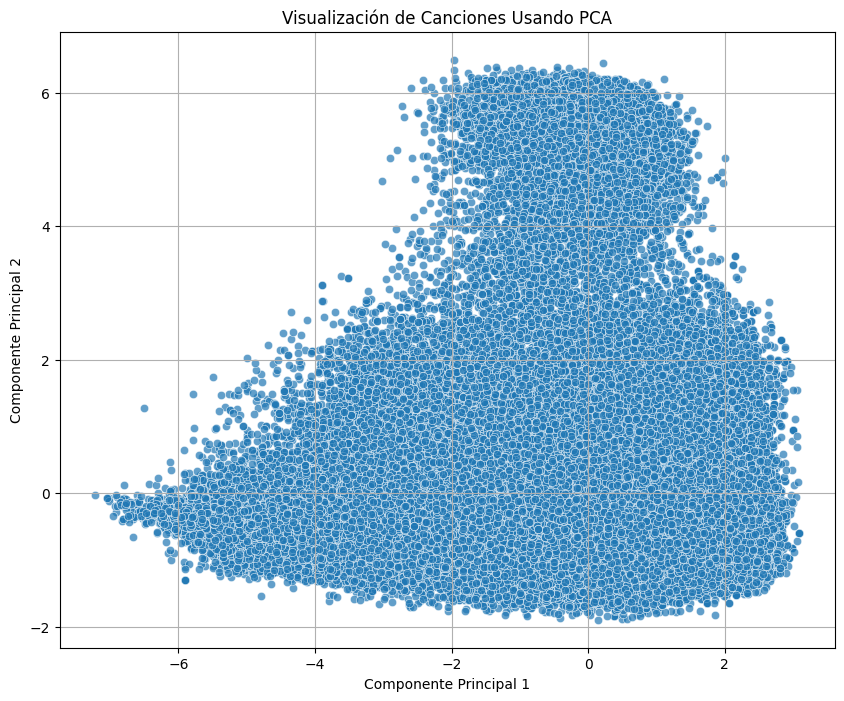

In [56]:
# Visualizar el resultado del PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.title('Visualización de Canciones Usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [25]:
# Opcional: Mostrar cuántas componentes fueron necesarias
print(f"Número de componentes principales necesarias para explicar el 96% de la varianza: {pca.n_components_}")

Número de componentes principales necesarias para explicar el 96% de la varianza: 8


In [26]:
pca.explained_variance_ratio_

array([0.38312835, 0.18022703, 0.12051695, 0.0931995 , 0.07730062,
       0.05805277, 0.04399771, 0.03076956])

In [29]:
pca.components_

array([[-0.42271807,  0.34036525,  0.46517713, -0.33299595,  0.05545084,
         0.47653366,  0.05337909,  0.16232028,  0.34471516],
       [ 0.22588513,  0.03391585,  0.04882586, -0.17338706,  0.64184297,
        -0.06209417,  0.67595274, -0.20597232, -0.01496001],
       [ 0.19692362,  0.57140653, -0.26568125, -0.11122248, -0.27759544,
        -0.14132596, -0.0051259 , -0.52892928,  0.4182511 ],
       [ 0.29420703,  0.19099197, -0.22793304, -0.03841751, -0.02484868,
        -0.22054678,  0.150785  ,  0.79044728,  0.35599658],
       [-0.13149666,  0.07433863,  0.22639885,  0.85565434,  0.20576773,
        -0.07508219,  0.03335227, -0.05265568,  0.37672128],
       [-0.1670655 ,  0.3920153 ,  0.0200616 ,  0.2526196 , -0.43719527,
         0.04756047,  0.54121921,  0.10961801, -0.50582403],
       [-0.19403378,  0.55026373, -0.27157058,  0.04689665,  0.5209177 ,
        -0.05490515, -0.40658609,  0.10591664, -0.36429444],
       [ 0.70393487,  0.1407932 ,  0.14297313,  0.17994614,  0

In [47]:
# Aplicar K-Means para generar los agrupamientos
# Usaremos k=5, basándonos en el análisis del método del codo
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

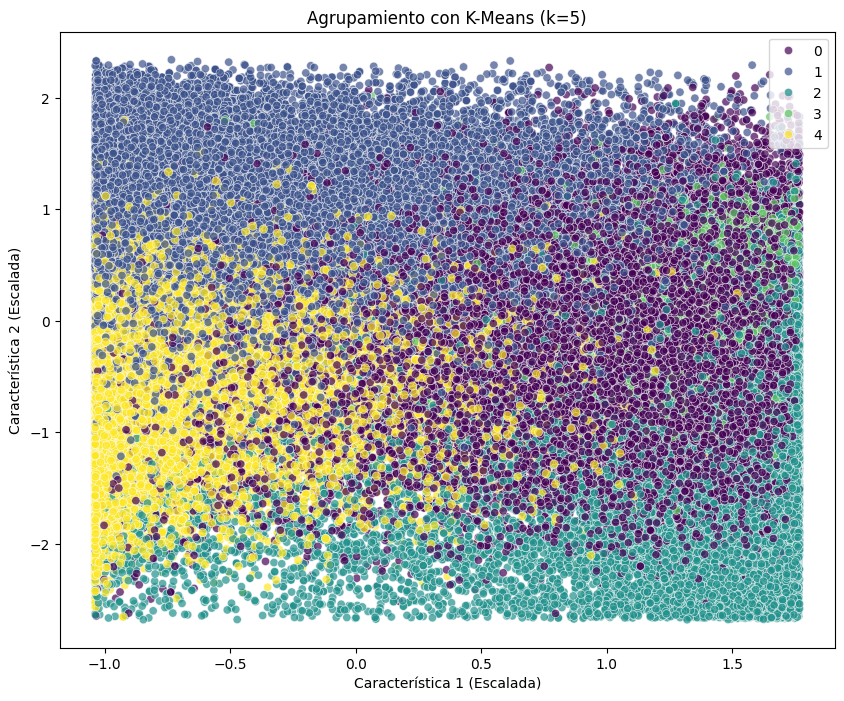

In [48]:
# Visualizar los clusters usando las primeras dos dimensiones
# Esto nos dará una primera impresión de cómo se ven los clusters.
plt.figure(figsize=(10, 8))
plt.title("Agrupamiento con K-Means (k=5)")
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.xlabel("Característica 1 (Escalada)")
plt.ylabel("Característica 2 (Escalada)")
plt.show()

In [52]:
#Añadir la columna de clusters al DataFrame original
df['cluster'] = clusters

In [53]:
# Generar la tabla de resumen
# Agrupar el DataFrame por el cluster y calcular la media de cada característica
summary_table = df.groupby('cluster')[features].mean()


In [ ]:
# Mostrar la tabla
print(summary_table)

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.697375      0.506147  0.332763          0.066356  0.178686   
1            0.192694      0.704638  0.670030          0.059300  0.172583   
2            0.844025      0.292362  0.165379          0.740426  0.146678   
3            0.789351      0.562818  0.663503          0.001191  0.729090   
4            0.099973      0.503566  0.766319          0.091934  0.244200   

          loudness  speechiness       tempo   valence  
cluster                                                
0       -12.008261     0.065861  111.752528  0.336002  
1        -7.041822     0.104922  108.926153  0.640722  
2       -20.922792     0.045696  102.478091  0.155164  
3       -11.988400     0.877456   98.023968  0.414632  
4        -5.947786     0.093683  142.572296  0.430969  


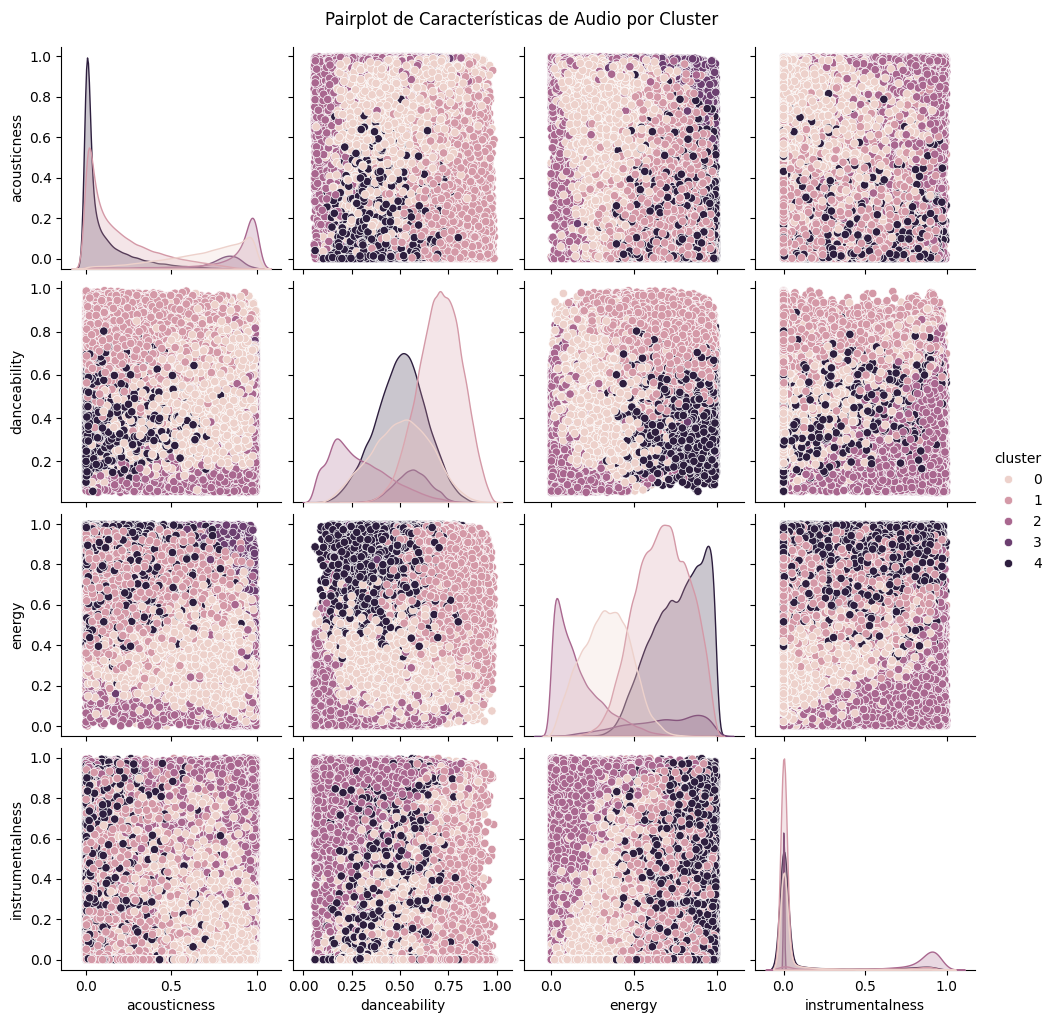

In [ ]:
#Generar el pairplot
# Seleccionamos un subconjunto de características para que el gráfico sea más legible

sns.pairplot(df, hue='cluster', vars=features[:4]) # Aquí usamos las primeras 4 características
plt.suptitle('Pairplot de Características de Audio por Cluster', y=1.02)
plt.show()